In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib

font = {'family': 'normal',
        'weight': 'bold',
        'size': 15}

matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [15, 7]


In [3]:
from os.path import expanduser

SRC_PATH = expanduser("~") + '/SageMaker/mastering-ml-on-aws/chapter5/'


In [4]:
from pyspark.context import SparkContext

sc = SparkContext('local', 'test')

from pyspark.sql import SQLContext

spark = SQLContext(sc)


In [5]:
df = spark.read.csv(SRC_PATH + 'data.csv', header=True, inferSchema=True)


In [6]:
df.toPandas().head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df = df.selectExpr("*", "Quantity * UnitPrice as TotalBought")


In [8]:
df.limit(5).toPandas()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalBought
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [9]:
customer_df = df.select("CustomerID", "TotalBought").groupBy("CustomerID").sum("TotalBought").withColumnRenamed(
    'sum(TotalBought)', 'SumTotalBought')


In [10]:
customer_df.show(5)


+----------+------------------+
|CustomerID|    SumTotalBought|
+----------+------------------+
|     17420| 598.8300000000002|
|     16861|            151.65|
|     16503|1421.4300000000005|
|     15727| 5178.960000000001|
|     17389|31300.080000000016|
+----------+------------------+
only showing top 5 rows



In [11]:
from pyspark.sql.functions import *

joined_df = df.join(customer_df, 'CustomerId')


In [12]:
joined_df.show(5)


+----------+---------+---------+--------------------+--------+--------------+---------+--------------+------------------+-----------------+
|CustomerID|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|       Country|       TotalBought|   SumTotalBought|
+----------+---------+---------+--------------------+--------+--------------+---------+--------------+------------------+-----------------+
|     17850|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|United Kingdom|15.299999999999999|5288.630000000009|
|     17850|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|United Kingdom|             20.34|5288.630000000009|
|     17850|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|United Kingdom|              22.0|5288.630000000009|
|     17850|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|United Kingdom|             20.34|5288.630000000009|
|     17850|   53636

In [13]:
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import Normalizer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import QuantileDiscretizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

stages = [StringIndexer(inputCol='StockCode', outputCol="stock_code_index", handleInvalid='keep'),
          OneHotEncoder(inputCol='stock_code_index', outputCol='stock_code_encoded'),
          StringIndexer(inputCol='Country', outputCol='country_index', handleInvalid='keep'),
          OneHotEncoder(inputCol='country_index', outputCol='country_encoded'),
          QuantileDiscretizer(numBuckets=3, inputCol='SumTotalBought', outputCol='total_bought_index'),
          VectorAssembler(inputCols=['stock_code_encoded', 'country_encoded', 'total_bought_index'],
                          outputCol='features_raw'),
          Normalizer(inputCol="features_raw", outputCol="features", p=1.0),
          KMeans(featuresCol='features').setK(3).setSeed(42)]

pipeline = Pipeline(stages=stages)

model = pipeline.fit(joined_df)


In [14]:
df_with_clusters = model.transform(joined_df).cache()


In [16]:
df_with_clusters.limit(5).toPandas()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalBought,SumTotalBought,stock_code_index,stock_code_encoded,country_index,country_encoded,total_bought_index,features_raw,features,prediction
0,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom,15.30,5288.63,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
1,17850,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom,20.34,5288.63,403.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom,22.00,5288.63,452.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom,20.34,5288.63,288.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom,20.34,5288.63,281.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


/Users/mgurmendez/.conda/envs/mastering-ml-on-aws/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


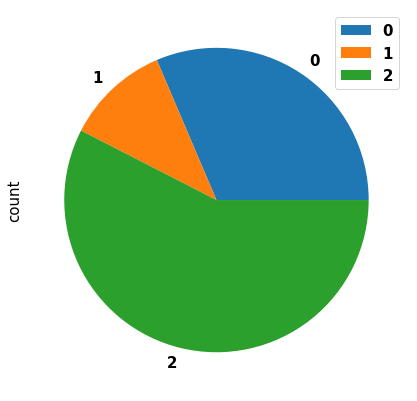

In [17]:
df_with_clusters.groupBy("prediction").count().toPandas().plot(kind='pie',x='prediction', y='count')

In [18]:
df_with_clusters.where(df_with_clusters.prediction==0).groupBy("Country").count().orderBy("count", ascending=False).show()

+--------------+------+
|       Country| count|
+--------------+------+
|United Kingdom|234097|
+--------------+------+



In [20]:
df_with_clusters.where(df_with_clusters.prediction==1).groupBy("Country").count().orderBy("count", ascending=False).show()

+--------------+------+
|       Country| count|
+--------------+------+
|United Kingdom|127781|
+--------------+------+



In [22]:
df_with_clusters.where(df_with_clusters.prediction==2).groupBy("Country").count().orderBy("count", ascending=False).show()

+---------------+-----+
|        Country|count|
+---------------+-----+
|        Germany| 9495|
|         France| 8491|
|           EIRE| 7485|
|          Spain| 2533|
|    Netherlands| 2371|
|        Belgium| 2069|
|    Switzerland| 1877|
|       Portugal| 1480|
|      Australia| 1259|
|         Norway| 1086|
|          Italy|  803|
|Channel Islands|  758|
|        Finland|  695|
|         Cyprus|  622|
|         Sweden|  462|
|        Austria|  401|
|        Denmark|  389|
|          Japan|  358|
|         Poland|  341|
|            USA|  291|
+---------------+-----+
only showing top 20 rows



In [23]:
pandas_df = df_with_clusters.limit(5000).select('CustomerID','InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','Country','TotalBought','SumTotalBought','prediction').toPandas()


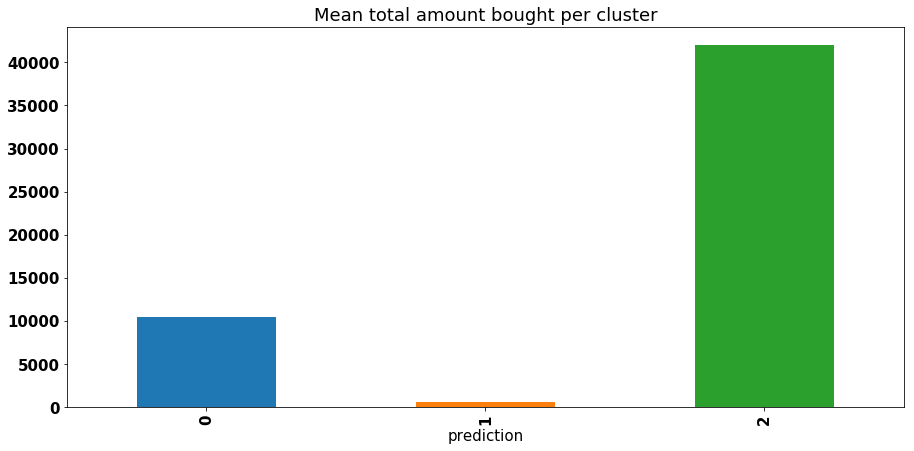

In [24]:
import matplotlib

pandas_df.groupby('prediction').describe()['SumTotalBought']['mean'].plot(kind='bar', title = 'Mean total amount bought per cluster')

In [25]:
pandas_df.groupby('prediction').describe()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="8" halign="left">CustomerID</th>
      <th colspan="2" halign="left">Quantity</th>
      <th>...</th>
      <th colspan="2" halign="left">TotalBought</th>
      <th colspan="8" halign="left">UnitPrice</th>
    </tr>
    <tr>
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
      <th>count</th>
      <th>mean</th>
      <th>...</th>
      <th>75%</th>
      <th>max</th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
    </tr>
    <tr>
      <th>prediction</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2372.0</td>
      <td>16043.289207</td>
      <td>1711.811134</td>
      <td>12748.0</td>
      <td>14573.0</td>
      <td>16210.0</td>
      <td>17841.0</td>
      <td>18239.0</td>
      <td>2372.0</td>
      <td>15.371417</td>
      <td>...</td>
      <td>25.5</td>
      <td>1627.2</td>
      <td>2372.0</td>
      <td>3.108196</td>
      <td>3.304927</td>
      <td>0.03</td>
      <td>1.25</td>
      <td>2.10</td>
      <td>3.75</td>
      <td>35.75</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2279.0</td>
      <td>15944.732339</td>
      <td>1607.798695</td>
      <td>12838.0</td>
      <td>14723.0</td>
      <td>15923.0</td>
      <td>17552.0</td>
      <td>18168.0</td>
      <td>2279.0</td>
      <td>4.869241</td>
      <td>...</td>
      <td>15.0</td>
      <td>350.4</td>
      <td>2279.0</td>
      <td>3.338591</td>
      <td>7.797187</td>
      <td>0.12</td>
      <td>1.25</td>
      <td>2.10</td>
      <td>3.75</td>
      <td>295.00</td>
    </tr>
    <tr>
      <th>2</th>
      <td>349.0</td>
      <td>13229.111748</td>
      <td>1045.705565</td>
      <td>12395.0</td>
      <td>12433.0</td>
      <td>12682.0</td>
      <td>14911.0</td>
      <td>14911.0</td>
      <td>349.0</td>
      <td>20.481375</td>
      <td>...</td>
      <td>33.9</td>
      <td>230.4</td>
      <td>349.0</td>
      <td>3.677221</td>
      <td>5.361564</td>
      <td>0.12</td>
      <td>1.25</td>
      <td>1.65</td>
      <td>3.75</td>
      <td>50.00</td>
    </tr>
  </tbody>
</table>
<p>3 rows × 40 columns</p>
</div>

In [26]:
from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(df_with_clusters)


In [27]:
silhouette

0.3471978832087873

In [28]:
import itertools
import re
from functools import reduce

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_word_cloud(description_column):
    list_of_word_sets = description_column.apply(str.split).tolist()
    text = list(itertools.chain(*list_of_word_sets))
    text = map(lambda x: re.sub(r'[^A-Z]', r'', x), text)
    text = reduce(lambda x, y: x + ' ' + y, text)
    wordcloud = WordCloud(
        width=3000,
        height=2000,
        background_color='black',
        stopwords=STOPWORDS,
        collocations=False).generate(str(text))
    fig = plt.figure(
        figsize=(10, 5),
        facecolor='k',
        edgecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


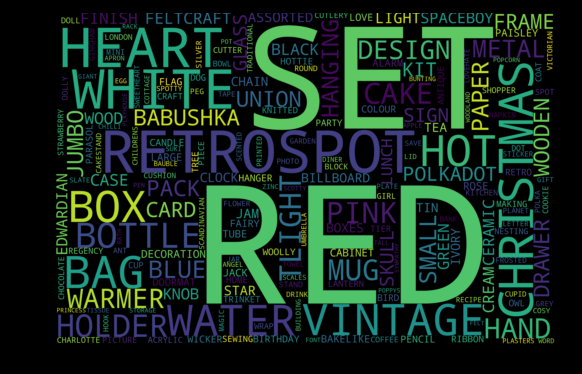

In [29]:
plot_word_cloud(pandas_df[pandas_df.prediction==0].Description)

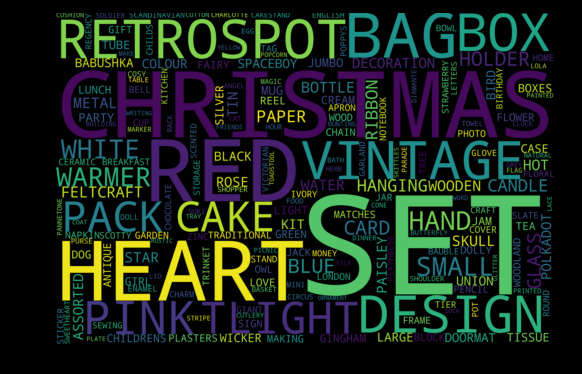

In [31]:
plot_word_cloud(pandas_df[pandas_df.prediction==1].Description)


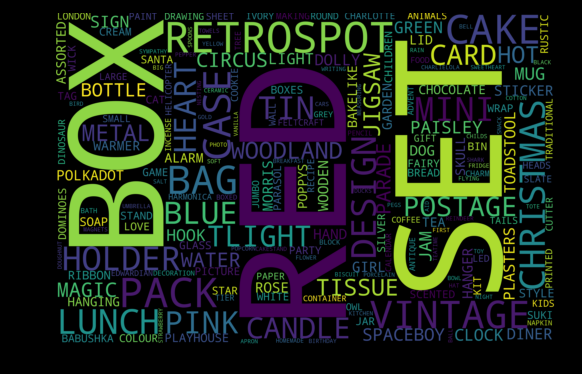

In [33]:
plot_word_cloud(pandas_df[pandas_df.prediction==2].Description)
